In [6]:
!pip install plotly


# LOGISTIC REGRESSION IMPLEMNTATION USING PYTHON



import necessary **libraries**

In [106]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [114]:
data=pd.read_csv("/content/Breast_cancer_data.csv")
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

Now cut the main part that is implementation

Sigmoid function : logistic regression uses a function that gives outputs between 0 and 1 for all values of X.
<br>Here our X refers to the dependent variable which is used to predict outputs.

sig(z)=$\frac{1}{1+e^z}$
<br>$z \rightarrow +\infty, \space\space g(z)\rightarrow 1 $
<br>$z \rightarrow -\infty, \space\space g(z)\rightarrow 10 $
<br>
here z=$\theta_0 +\theta_1x_1+\theta_2x2 $

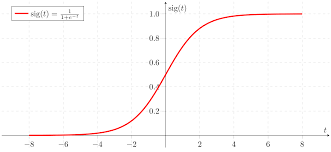

In [117]:
def sigmoid(X,theta):
  z=np.dot(theta,X.T) #transposing the X matrix because every column will have its own value of theta and transposing will serve this purpose
  return 1/(1+np.exp(-(z)))-0.0000001 #to avoid exception in cost function we add a factor -0.0000001






cost function is defined as<br>
Cost($h_ {\Theta}$(x),y) = \{\begin{matrix} 0 &if  &h_{\Theta}(x)=y\\  \infty  & if & y=0 &and &h_{\Theta}(x)\rightarrow 1 \\   \infty & if &y=1  &and  &h_{\Theta}(x)\rightarrow 0  \end{matrix}
<br><br>simplified cost function
<br>  $Cost(h_{\Theta}(x),y)$ = $-y log(h_{\Theta}(x)) - (1-y) log(1-h_{\Theta}$(x))  
  $J({\Theta}) $=$ \frac{-1}{m}\sum_{i=1}^{m} Cost(h_{\Theta}(x),y)  $


In [118]:
def cost(X, y, theta):
    y1 = sigmoid(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

TypeError: ignored

gradient decent
<br>
 $\Theta_{j} := \Theta_{j} - \alpha \sum_{i = 1}^{m}(h_\Theta(x^{(i)})- y^{(i)})x_j^{(i)} $
 <br>
 where
 <br>
alpha= learning rate


In [119]:
def gradient_descent(X, y, theta, lr, epochs):
    m =len(X) #no
    J = [cost(X, y, theta)] 
    for i in range(0, epochs): #this loop will run for certain (mentioned=epochs)amount of iteration  until cost is minimized
        h = sigmoid(X, theta)
        for i in range(0, len(X.columns)): #now this loop finds theta for each column and this loop repeats itself oaccording to the outer loop
            theta[i] -= (lr/m) * np.sum((h-y)*X.iloc[:, i])
            #applying the gradient descent function and finding theta 
            #as you can see for the next iteration of outer loop the value of theta in the array gets updatedn with new value of theta for that particular  column
        J.append(cost(X, y, theta))
    return J, theta

In [120]:
theta = [0.5]*len(X.columns)


In [121]:
X.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness'],
      dtype='object')

In [122]:

L, theta = gradient_descent(X_train, y_train, theta, 0.03, 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

invalid value encountered in log



In [123]:
len(theta)

5

In [124]:
def predict(X, y, theta, alpha, epochs):
    J, th = gradient_descent(X, y, theta, alpha, epochs) 
    h = sigmoid(X, theta)
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J, acc

In [125]:
J, acc = predict(X, y, theta, 0.000002, 50000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

invalid value encountered in log



In [126]:
acc

0.8471001757469244